1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MaxNLocator
import seaborn as sns

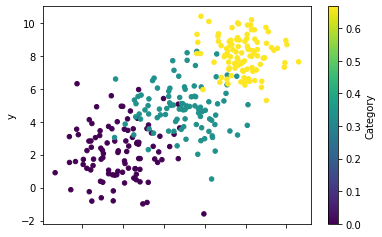

In [3]:
# Write a function that generate a 2D datasets of 2 categories. Each category 
# should distribute as a 2D gaussian with a given mean and std 
# (clearly it is better to have different values means..)
def dataset(mean, variance, dim):
    
    col_names = ["x", "y","Category"]
    
    val = np.zeros([0, 3])
    
    for i in range(len(mean)):
        mean_ = np.ones((2)) * mean[i]
        cov_mat = np.eye(2) * variance[i]
        distribution = np.random.multivariate_normal(mean_, cov_mat, size = dim[i])
        cat_dist = np.concatenate([distribution, np.ones((dim[i], 1))*i/len(mean)], axis = 1)
        val = np.concatenate([val, cat_dist], axis = 0)
    
    df = pd.DataFrame(val, columns = col_names)
    
    return df

mean = [2, 5, 8]
var = [3, 2, 1]
dim = [100, 100, 100]
df = dataset(mean, var, dim)
df.plot.scatter("x", "y", c = "Category", cmap='viridis')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/


--2021-12-01 14:29:02--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-01 14:29:03--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc188c2133e391b3ddaffe2c6294.dl.dropboxusercontent.com/cd/0/inline/BbAkzDd3fLEqdaJkE2cSt6ughwfhvLGa9EoK-D2v2VesmXKTqY09RotC8R3WzvQgLLeHGfCcDnFzCyx_R2cKaGoVjYnzyJyKRqATkQujJxJGN6_4MH_yASETm7lmQm1SLJiINTOUmp_Cx-SSozDuSfYW/file# [following]
--2021-12-01 14:29:03--  https://uc188c2133e391b3ddaffe2c6294.dl.dropboxusercontent.com/cd/0/inline/BbAkzDd3fLEqdaJkE2cSt6ughwfhvLGa9EoK-D2v2VesmXKTqY09RotC8R3WzvQgLLeHGfCcDnF

In [5]:
dataset = np.load("/content/data/residuals_261.pkl", allow_pickle = True).tolist()
df = pd.DataFrame(dataset)
df = df[df["residuals"].abs() < 2]
print(df.head())

    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


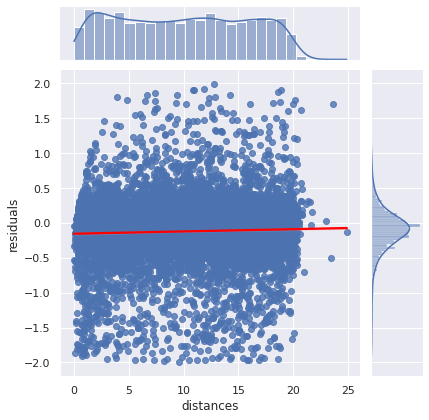

In [6]:
from scipy.stats import linregress
import seaborn as sns
slope, intercept, r_value, p_value, std_err = linregress(df["distances"], df["residuals"])
sns.set(rc={'figure.figsize':(12,12)})
sns.jointplot(df["distances"], df["residuals"],data=df, kind='reg', joint_kws={'line_kws':{'color':'red'}})

Text(0, 0.5, 'Residuals')

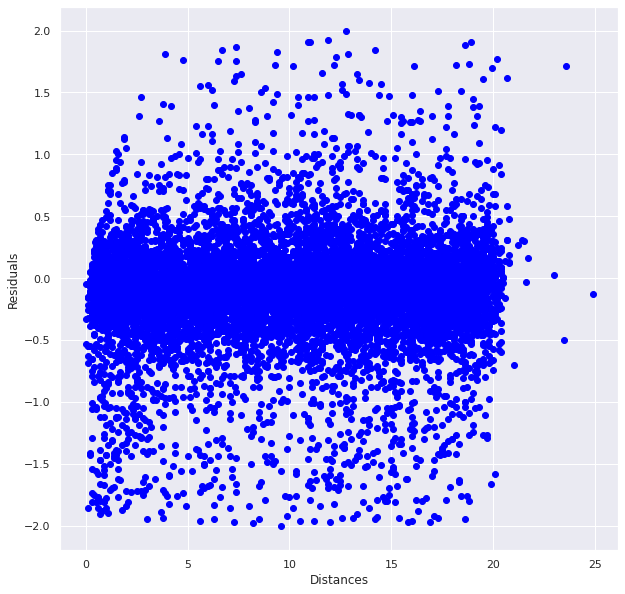

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df["distances"], df["residuals"], c  ="blue")
plt.xlabel("Distances")
plt.ylabel("Residuals")

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [8]:
#Fill a numpy array x of length N (with  N=O(100) ) with a variable normally distributed, with a given mean and standard deviation 
mean = 0
std = 1
n = 300
arr = np.random.normal(mean,std,n)

19 <class 'int'>


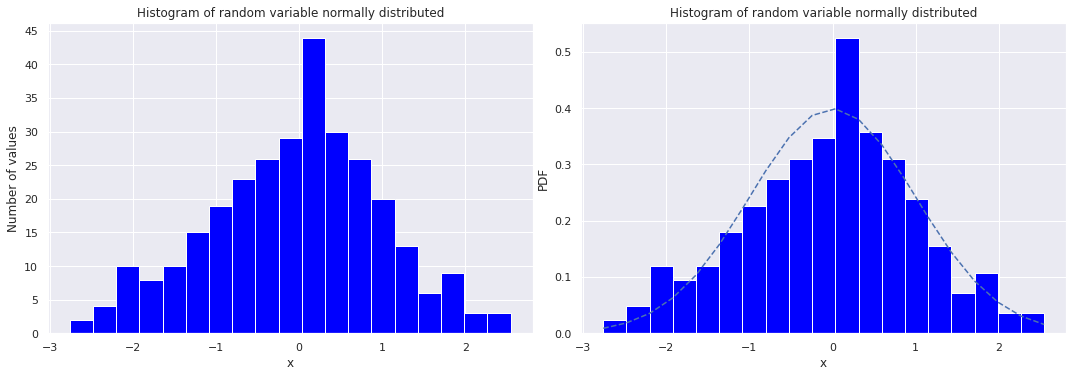

In [9]:
# Fill an histogram in pyplot
nBins = int(1 + 3.322*np.log(n))
print(nBins, type(nBins))

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15, 5))
fig.tight_layout()

hist, bins, _ = ax1.hist(arr, nBins, color='blue', edgecolor='white') 

y = ((1/(np.sqrt(2*np.pi)*std))*np.exp(-0.5*(1/std*(bins - mean))**2))
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_title("Histogram of random variable normally distributed")
ax1.set_xlabel('x')
ax1.set_ylabel('Number of values')

ax2.plot(bins, y, '--')
ax2.hist(arr, nBins, color='blue', edgecolor='white', density=1)
ax2.set_title("Histogram of random variable normally distributed")
ax2.set_xlabel('x')
ax2.set_ylabel('PDF')
plt.show()

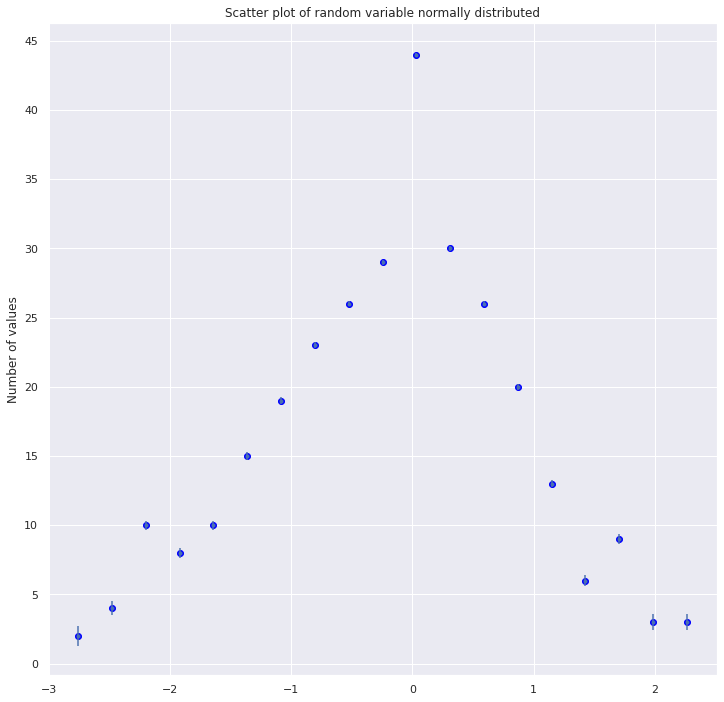

In [10]:
ax = plt.axes()
hist, bin_edges = np.histogram(arr, bins)
bin_edges = bin_edges[:-1]
ax.scatter(bin_edges,hist, color='blue')
ax.errorbar(bin_edges, hist, yerr=(1/np.sqrt(hist)),fmt='.', ecolor='b')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Scatter plot of random variable normally distributed")
ax.set_ylabel('Number of values')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curre

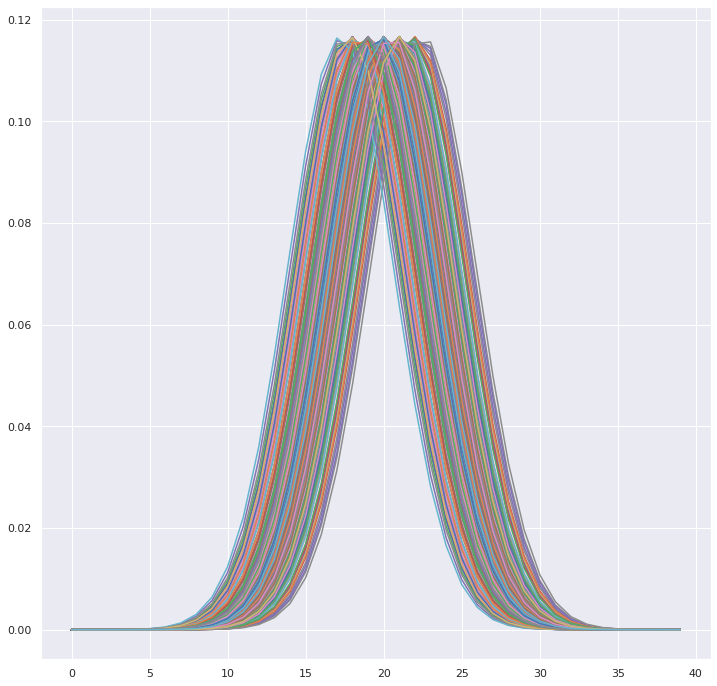

In [11]:
from scipy.stats import norm
from scipy.integrate import trapz

sum_arr = 0
for i in range(len(arr)):
    mean = arr[i]
    std = 1.06*arr.std()*arr.size**(1/5)
    npdf = norm(mean, std)
    ax = plt.axes()
    ax.plot(npdf.pdf(range(-20,20)))